In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split # Machine learning packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn import tree

### Preparación de datos ( Ignorar :) )

In [32]:
column_names = ["bjets[0].Pt()", "bjets[1].Pt()", "bjets[2].Pt()", "bjets[3].Pt()", "(bjets[0].Eta() - bjets[1].Eta())", "(bjets[0].Eta() - bjets[2].Eta())", "(bjets[0].Eta() - bjets[3].Eta())", 
"(bjets[1].Eta() - bjets[2].Eta())", "(bjets[1].Eta() - bjets[3].Eta())", "(bjets[2].Eta() - bjets[3].Eta())", "bjets[0].DeltaPhi(bjets[1])", "bjets[0].DeltaPhi(bjets[2])", "bjets[0].DeltaPhi(bjets[3])", 
"bjets[1].DeltaPhi(bjets[2])", "bjets[1].DeltaPhi(bjets[3])", "bjets[2].DeltaPhi(bjets[3])","bjets[0].DeltaR(bjets[1])", "bjets[0].DeltaR(bjets[2])", "bjets[0].DeltaR(bjets[3])", 
"bjets[1].DeltaR(bjets[2])", "bjets[1].DeltaR(bjets[3])", "bjets[2].DeltaR(bjets[3])", "MET.Pt()", "np.sum(np.array(leptons)).Pt()", "(leptons_tot + MET).Mt()", "(bjets[0] + bjets[1]).M()", 
"(bjets[0] + bjets[2]).M()", "(bjets[0] + bjets[3]).M()", "(bjets[1] + bjets[2]).M()", "(bjets[1] + bjets[3]).M()", "(bjets[2] + bjets[3]).M()", "(bjets[0] + leptons_tot + MET).Mt()", 
"(bjets[1] + leptons_tot + MET).Mt()", "(bjets[2] + leptons_tot + MET).Mt()", "(bjets[3] + leptons_tot + MET).Mt()", "(jets[0] + jets[1]).M()", "jets[0].Pt()", "jets[1].Pt()", "jets[0].DeltaR(jets[1])",
 "bjets[0].DeltaR(leptons_tot)", "bjets[1].DeltaR(leptons_tot)", "bjets[2].DeltaR(leptons_tot)", "bjets[3].DeltaR(leptons_tot)", "bjets[0].DeltaPhi(leptons_tot)", "bjets[1].DeltaPhi(leptons_tot)", 
 "bjets[2].DeltaPhi(leptons_tot)", "bjets[3].DeltaPhi(leptons_tot)", "bjets[0].Phi", "bjets[1].Phi", "bjets[0].Eta", "bjets[1].Eta", "jets[0].Phi", "jets[1].Phi", "jets[0].Eta", "jets[1].Eta", 
 "leptons_tot.Phi", "leptons_tot.Eta", "class", "type"]

dfs1, dfs2, dfs3 = pd.read_csv("signal250.txt", names=column_names, sep=" "), pd.read_csv("signal350.txt", names=column_names, sep=" "), pd.read_csv("signal1000.txt", names=column_names, sep=" ")
dfb1, dfb2, dfb3 = pd.read_csv("bkg1.txt", names=column_names, sep=" "), pd.read_csv("bkg2.txt", names=column_names, sep=" "), pd.read_csv("bkg3.txt", names=column_names, sep=" ")

dfs1["class"], dfs2["class"], dfs3["class"], dfb1["class"], dfb2["class"], dfb3["class"] = 1, 1, 1, 0, 0, 0
dfs1["type"], dfs2["type"], dfs3["type"], dfb1["type"], dfb2["type"], dfb3["type"] = "sgn1", "sgn2", "sgn3", "bkg1", "bkg2", "bkg3"

df = pd.concat([dfs1, dfs2, dfs3, dfb1, dfb2, dfb3], ignore_index=True)

dataprime = pd.concat([df.iloc[:,:47], df.iloc[:,-2:]], axis=1)
s1 = dataprime.loc[dataprime["type"] == "sgn1"]
s2 = dataprime.loc[dataprime["type"] == "sgn2"]
s3 = dataprime.loc[dataprime["type"] == "sgn3"]
b1 = dataprime.loc[dataprime["type"] == "bkg1"]
b2 = dataprime.loc[dataprime["type"] == "bkg2"]
b3 = dataprime.loc[dataprime["type"] == "bkg3"]

frames1, frames2, frames3 = [s1, b1.iloc[:int(len(s1.index)/3.0), :], b2.iloc[:int(len(s1.index)/3.0), :], b3.iloc[:int(len(s1.index)/3.0), :]], [s2, b1.iloc[:int(len(s2.index)/3.0), :], b2.iloc[:int(len(s2.index)/3.0), :], b3.iloc[:int(len(s2.index)/3.0), :]], [s3, b1.iloc[:int(len(s3.index)/3.0), :], b2.iloc[:int(len(s3.index)/3.0), :], b3.iloc[:int(len(s3.index)/3.0), :]]

datap1, datap2, datap3 = pd.concat(frames1), pd.concat(frames2), pd.concat(frames3)

datap1

,bjets[0].Pt(),bjets[1].Pt(),bjets[2].Pt(),bjets[3].Pt(),(bjets[0].Eta() - bjets[1].Eta()),(bjets[0].Eta() - bjets[2].Eta()),(bjets[0].Eta() - bjets[3].Eta()),(bjets[1].Eta() - bjets[2].Eta()),(bjets[1].Eta() - bjets[3].Eta()),(bjets[2].Eta() - bjets[3].Eta()),...,bjets[0].DeltaR(leptons_tot),bjets[1].DeltaR(leptons_tot),bjets[2].DeltaR(leptons_tot),bjets[3].DeltaR(leptons_tot),bjets[0].DeltaPhi(leptons_tot),bjets[1].DeltaPhi(leptons_tot),bjets[2].DeltaPhi(leptons_tot),bjets[3].DeltaPhi(leptons_tot),class,type
0,85.790062,79.101341,76.226639,73.484489,-1.834188,-0.672529,-1.763499,1.161659,0.070688,-1.090971,...,2.651338,0.918119,1.369247,1.887533,2.073459,-0.899938,0.956414,1.884259,1,sgn1
1,199.395157,64.486130,57.019939,49.212360,-0.730201,0.452975,-1.372216,1.183176,-0.642015,-1.825191,...,0.707457,2.552826,0.794673,2.405341,0.238163,-2.137074,0.765543,-1.276979,1,sgn1
2,108.240120,107.411797,102.838387,40.021046,1.543365,-0.485863,-1.095197,-2.029228,-2.638563,-0.609334,...,1.069924,2.152137,2.105191,3.017604,1.017498,1.057904,-2.099474,-2.919185,1,sgn1
3,190.237045,96.510109,69.834419,63.006943,0.146976,-1.331831,0.458187,-1.478806,0.311212,1.790018,...,2.163157,2.493140,4.210813,2.640569,1.033992,-1.772724,2.699264,-2.212170,1,sgn1
4,221.238800,118.019905,56.416767,33.174603,1.265345,0.453719,1.305476,-0.811625,0.040131,0.851757,...,3.201904,2.018901,1.262092,2.237806,3.115782,-0.253111,-0.416616,-0.912963,1,sgn1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97890,255.430542,122.749817,116.968292,110.687889,-1.704186,-1.900271,-1.173590,-0.196086,0.530596,0.726682,...,2.807700,2.004631,1.085945,0.517018,2.686027,-1.797910,0.084041,-0.374923,0,bkg3
97891,124.438179,65.141716,53.507172,52.842712,0.076654,-0.476945,-0.503437,-0.553599,-0.580090,-0.026491,...,1.920514,3.141797,2.038115,2.866478,1.750042,-3.059503,-1.595669,2.557550,0,bkg3
97892,78.006691,49.945076,46.788639,40.991722,2.558095,2.067611,1.586548,-0.490484,-0.971547,-0.481062,...,1.427355,2.232073,1.506408,1.872301,-1.068632,-1.544043,1.005878,1.759407,0,bkg3
97893,368.648376,149.937195,65.914497,33.615135,-1.843894,-1.221882,-0.370761,0.622013,1.473134,0.851121,...,2.069372,2.018015,2.317998,2.173683,-1.907863,1.727930,2.279556,2.130583,0,bkg3


### Separamos los datos de sus respectivas clases asociadas

In [33]:
data1, data2, data3 = datap1.iloc[:,:47], datap2.iloc[:,:47], datap3.iloc[:,:47]
target1, target2, target3 = datap1.iloc[:,-2], datap2.iloc[:,-2], datap3.iloc[:,-2]

### Separamos nuestros datos entre datos de entrenamiento (75%) y datos de prueba (25%)

In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.25, random_state=0) # 0.25 significa 25% de los datos. Si es entero, representa numero de test samples
x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.25, random_state=0) # tambien se puede especificar el train_size
x_train3, x_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size=0.25, random_state=0)

### Entrenamos los tres modelos

In [35]:
dt1 = DecisionTreeClassifier() 
dt1.fit(x_train1, y_train1)

dt2 = DecisionTreeClassifier() 
dt2.fit(x_train2, y_train2)

dt3 = DecisionTreeClassifier() 
dt3.fit(x_train3, y_train3)

DecisionTreeClassifier()

### Encontramos valores de precision y recall para los tres modelos

In [36]:
predictions1, predictions2, predictions3 = dt1.predict(x_test1), dt2.predict(x_test2), dt3.predict(x_test3)

precision1, precision2, precision3  = precision_score(y_test1, predictions1, average='micro'), precision_score(y_test2, predictions2, average='micro'), precision_score(y_test3, predictions3, average='micro')

recall1, recall2, recall3 = recall_score(y_test1, predictions1, average='micro'), recall_score(y_test2, predictions2, average='micro'), recall_score(y_test3, predictions3, average='micro')


print("The precision for the first model is: ", precision1)
print("The precision for the second model is: ", precision2)
print("The precision for the third model is: ", precision3)
print("\n")
print("The recall for the first model is: ", recall1)
print("The recall for the second model is: ", recall2)
print("The recall for the third model is: ", recall3)

The precision for the first model is:  0.5563965884861407
The precision for the second model is:  0.6030571512024145
The precision for the third model is:  0.8275084554678692


The recall for the first model is:  0.5563965884861407
The recall for the second model is:  0.6030571512024145
The recall for the third model is:  0.8275084554678692


### Encontramos las matrices de confusión

Confusion matrix for the first model is: 
[[2603 2123]
 [2038 2616]]
Confusion matrix for the second model is: 
[[3100 2089]
 [1988 3094]]
Confusion matrix for the third model is: 
[[2561  544]
 [ 527 2577]]


Text(0.5, 1.0, 'Score: 0.828')

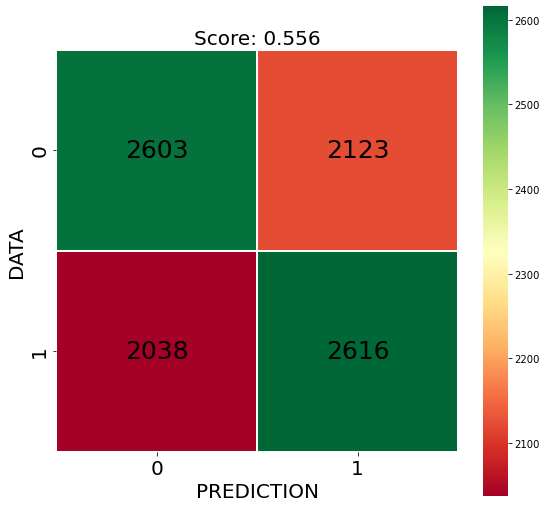

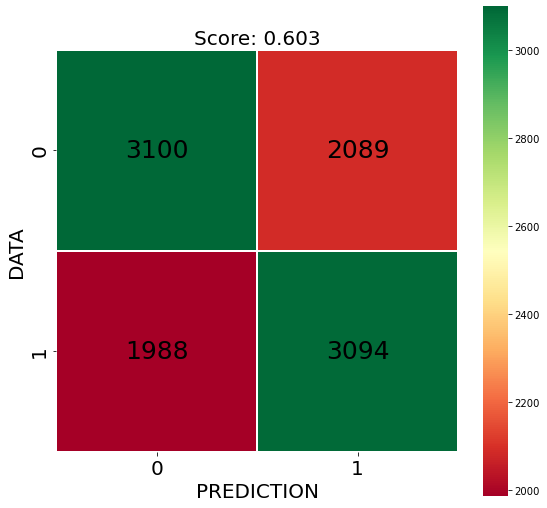

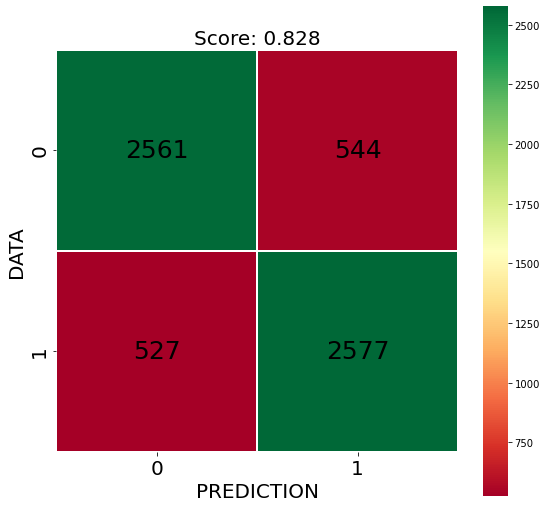

In [37]:
cm1, cm2, cm3 = metrics.confusion_matrix(y_test1, predictions1), metrics.confusion_matrix(y_test2, predictions2), metrics.confusion_matrix(y_test3, predictions3) 
print("Confusion matrix for the first model is: ")
print(cm1)
print("Confusion matrix for the second model is: ")
print(cm2)
print("Confusion matrix for the third model is: ")
print(cm3)

plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = "RdYlGn", cbar=True, annot_kws={"fontsize":25, "color":"k"})
plt.ylabel('DATA', fontsize=20)
plt.xlabel('PREDICTION', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
all_sample_title = 'Score: {0}'.format(format(recall1, ".3f"))
plt.title(all_sample_title, size = 20)

plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = "RdYlGn", cbar=True, annot_kws={"fontsize":25, "color":"k"})
plt.ylabel('DATA', fontsize=20)
plt.xlabel('PREDICTION', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
all_sample_title = 'Score: {0}'.format(format(recall2, ".3f"))
plt.title(all_sample_title, size = 20)

plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = "RdYlGn", cbar=True, annot_kws={"fontsize":25, "color":"k"})
plt.ylabel('DATA', fontsize=20)
plt.xlabel('PREDICTION', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
all_sample_title = 'Score: {0}'.format(format(recall3, ".3f"))
plt.title(all_sample_title, size = 20)

### Importancia de cada variable (solo para tercer modelo)

In [40]:
importance3 = dt3.feature_importances_

for i,s in enumerate(importance3):
    print('Feature: %0s, Score: %.5f' % (column_names[i],s))

Feature: bjets[0].Pt(), Score: 0.51766
Feature: bjets[1].Pt(), Score: 0.01241
Feature: bjets[2].Pt(), Score: 0.00763
Feature: bjets[3].Pt(), Score: 0.00760
Feature: (bjets[0].Eta() - bjets[1].Eta()), Score: 0.00813
Feature: (bjets[0].Eta() - bjets[2].Eta()), Score: 0.00746
Feature: (bjets[0].Eta() - bjets[3].Eta()), Score: 0.00735
Feature: (bjets[1].Eta() - bjets[2].Eta()), Score: 0.00693
Feature: (bjets[1].Eta() - bjets[3].Eta()), Score: 0.00435
Feature: (bjets[2].Eta() - bjets[3].Eta()), Score: 0.00698
Feature: bjets[0].DeltaPhi(bjets[1]), Score: 0.00741
Feature: bjets[0].DeltaPhi(bjets[2]), Score: 0.00746
Feature: bjets[0].DeltaPhi(bjets[3]), Score: 0.00662
Feature: bjets[1].DeltaPhi(bjets[2]), Score: 0.00910
Feature: bjets[1].DeltaPhi(bjets[3]), Score: 0.00687
Feature: bjets[2].DeltaPhi(bjets[3]), Score: 0.00784
Feature: bjets[0].DeltaR(bjets[1]), Score: 0.00674
Feature: bjets[0].DeltaR(bjets[2]), Score: 0.00684
Feature: bjets[0].DeltaR(bjets[3]), Score: 0.00602
Feature: bjets[1].D

<BarContainer object of 47 artists>

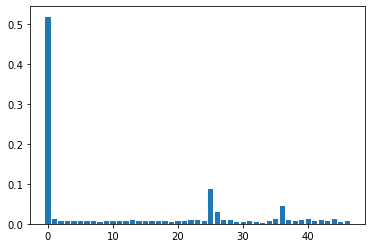

In [41]:
plt.bar([x for x in range(len(importance3))], importance3)

### Visualizamos los árboles de decisión

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt1, feature_names = column_names)

[Text(287.1619092705245, 894.9512195121952, '(bjets[0] + bjets[1]).M() <= 186.202\ngini = 0.5\nsamples = 28140\nvalue = [14033, 14107]'),
 Text(110.3135772279582, 872.8536585365854, '(bjets[0] + bjets[3]).M() <= 144.169\ngini = 0.448\nsamples = 6869\nvalue = [4546, 2323]'),
 Text(64.27128635056232, 850.7560975609756, '(bjets[0] + bjets[2]).M() <= 181.574\ngini = 0.382\nsamples = 3729\nvalue = [2771, 958]'),
 Text(43.734291848348605, 828.6585365853658, '(bjets[1] + bjets[2]).M() <= 157.703\ngini = 0.339\nsamples = 2722\nvalue = [2133, 589]'),
 Text(26.21660996034571, 806.560975609756, 'bjets[0].Pt() <= 87.302\ngini = 0.316\nsamples = 2356\nvalue = [1892, 464]'),
 Text(17.80427832121149, 784.4634146341464, '(bjets[1].Eta() - bjets[3].Eta()) <= 1.215\ngini = 0.254\nsamples = 1063\nvalue = [904, 159]'),
 Text(12.51763979235379, 762.3658536585366, 'bjets[2].Pt() <= 31.055\ngini = 0.226\nsamples = 884\nvalue = [769, 115]'),
 Text(12.275731349334569, 740.2682926829268, 'gini = 0.0\nsamples = 

Error in callback <function flush_figures at 0x000001BC727483A0> (for post_execute):


KeyboardInterrupt: 